### Nobel Prize Analysis

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
pio.renderers.default = "notebook_connected"

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
df = pd.read_csv('nobel_prize_data.csv')

The data is upto year 2020 Nobel prize laureates
<br><br><br>

# Data Exploration & Cleaning

In [4]:
print('the shape of df',df.shape)
df.head()

the shape of df (962, 16)


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


In [5]:
df.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [6]:
print('The year was the Nobel prize first awarded',df.year.min())

The year was the Nobel prize first awarded 1901


In [7]:
print('The year is the latest year included in the dataset',df.year.max())

The year is the latest year included in the dataset 2020


### Check for Duplicates

In [8]:
df.duplicated().values.any()

False

### Checking Missing Values

In [9]:
for i in df.columns:
    print(f'"{i}" column has NaN values =',df[i].isna().values.any())

"year" column has NaN values = False
"category" column has NaN values = False
"prize" column has NaN values = False
"motivation" column has NaN values = True
"prize_share" column has NaN values = False
"laureate_type" column has NaN values = False
"full_name" column has NaN values = False
"birth_date" column has NaN values = True
"birth_city" column has NaN values = True
"birth_country" column has NaN values = True
"birth_country_current" column has NaN values = True
"sex" column has NaN values = True
"organization_name" column has NaN values = True
"organization_city" column has NaN values = True
"organization_country" column has NaN values = True
"ISO" column has NaN values = True


In [10]:
df.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [11]:
col_subset = ['year','category', 'laureate_type','full_name','birth_date', 'organization_name']
df[df.organization_name.isna()][col_subset]

,year,category,laureate_type,full_name,birth_date,organization_name
1,1901,Literature,Individual,Sully Prudhomme,1839-03-16,NaN
3,1901,Peace,Individual,Frédéric Passy,1822-05-20,NaN
4,1901,Peace,Individual,Jean Henry Dunant,1828-05-08,NaN
7,1902,Literature,Individual,Christian Matthias Theodor Mommsen,1817-11-30,NaN
9,1902,Peace,Individual,Charles Albert Gobat,1843-05-21,NaN
...,...,...,...,...,...,...
932,2018,Peace,Individual,Nadia Murad,1993-07-02,NaN
942,2019,Literature,Individual,Peter Handke,1942-12-06,NaN
946,2019,Peace,Individual,Abiy Ahmed Ali,1976-08-15,NaN
954,2020,Literature,Individual,Louise Glück,1943-04-22,NaN


when we look at for rows where the organization_name column has no value, we also see that many prizes went to people who were not affiliated with a university or research institute. This includes many of the Literature and Peace prize winners.
<br><br><br><br>

### Type Conversions
##### Convert Year and Birth Date to Datetime

In [12]:
df.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  ISO                    

In [14]:
df.birth_date = pd.to_datetime(df.birth_date)

In [15]:
df.dtypes

year                              int64
category                         object
prize                            object
motivation                       object
prize_share                      object
laureate_type                    object
full_name                        object
birth_date               datetime64[ns]
birth_city                       object
birth_country                    object
birth_country_current            object
sex                              object
organization_name                object
organization_city                object
organization_country             object
ISO                              object
dtype: object

#### Add a Column with the Prize Share as a Percentage

In [16]:
share_pct = df.prize_share.str.split("/",expand=True)

In [17]:
numerator = pd.to_numeric(share_pct[0])
denominator = pd.to_numeric(share_pct[1])
share_pct = numerator/denominator

df.insert(5,'share_pct',share_pct)
df.head()

,year,category,prize,motivation,prize_share,share_pct,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,1.00,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,1.00,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,1.00,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,0.50,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,0.50,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


# Percentage of Male vs. Female Laureates

In [18]:
gender = df.sex.value_counts()
gender

sex
Male      876
Female     58
Name: count, dtype: int64

In [19]:
fig = px.pie(
    title='Percentage of Male vs. Female Winners',
    labels=gender.index,
    values=gender.values,
    names=gender.index,
    hole=0.5
)
fig.update_traces(
    textposition='inside',
    textfont_size=15,
    textinfo='percent'
                 )
fig.show()

# The first 3 Women to Win the Nobel Prize

In [20]:
first_top_women_prize = df[df['sex'] == "Female"][:3]
first_top_women_prize

,year,category,prize,motivation,prize_share,share_pct,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,0.25,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,1.00,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,1.00,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE


In [21]:
first_top_women_prize.prize

18       The Nobel Prize in Physics 1903
29            The Nobel Peace Prize 1905
51    The Nobel Prize in Literature 1909
Name: prize, dtype: object

In [22]:
print(first_top_women_prize.birth_country)

18             Russian Empire (Poland)
29    Austrian Empire (Czech Republic)
51                              Sweden
Name: birth_country, dtype: object


# The Repeat Winners

In [23]:
multiple_winners = df[df.duplicated(subset=['full_name'],keep=False)]
multiple_winners[col_subset]

,year,category,laureate_type,full_name,birth_date,organization_name
18,1903,Physics,Individual,"Marie Curie, née Sklodowska",1867-11-07,NaN
62,1911,Chemistry,Individual,"Marie Curie, née Sklodowska",1867-11-07,Sorbonne University
89,1917,Peace,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN
215,1944,Peace,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN
278,1954,Chemistry,Individual,Linus Carl Pauling,1901-02-28,California Institute of Technology (Caltech)
283,1954,Peace,Organization,Office of the United Nations High Commissioner...,NaT,NaN
297,1956,Physics,Individual,John Bardeen,1908-05-23,University of Illinois
306,1958,Chemistry,Individual,Frederick Sanger,1918-08-13,University of Cambridge
340,1962,Peace,Individual,Linus Carl Pauling,1901-02-28,California Institute of Technology (Caltech)
348,1963,Peace,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN


There are 6 winners who were awarded the prize more than once,Only 4 of the repeat laureates were individuals.

In [24]:
multiple_winners.full_name.unique()

array(['Marie Curie, née Sklodowska',
       'Comité international de la Croix Rouge (International Committee of the Red Cross)',
       'Linus Carl Pauling',
       'Office of the United Nations High Commissioner for Refugees (UNHCR)',
       'John Bardeen', 'Frederick Sanger'], dtype=object)

We see that Marie Curie actually got the Nobel prize twice - once in physics and once in chemistry. Linus Carl Pauling got it first in chemistry and later for peace given his work in promoting nuclear disarmament. Also, the International Red Cross was awarded the Peace prize a total of 3 times. The first two times were both during the devastating World Wars.
<br><br><br><br>

# Number of Prizes per Category

In [25]:
df.category.unique()

array(['Chemistry', 'Literature', 'Medicine', 'Peace', 'Physics',
       'Economics'], dtype=object)

In [26]:
df.category.nunique()

6

In [27]:
price_per_category = df.category.value_counts()
price_per_category

category
Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: count, dtype: int64

In [28]:
# price_per_category = pd.DataFrame(price_per_category)
price_per_category

category
Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: count, dtype: int64

In [29]:
# price_per_category = df.category.count()
prizes_per_category = df.category.value_counts()

bar_fig = px.bar(
        x=price_per_category.index,
        y=price_per_category.values,
        color = prizes_per_category.values,
        color_continuous_scale='Aggrnyl',
        title='Number of Prizes Awarded per Category'
)

bar_fig.update_layout(
    xaxis_title='Categories',
    yaxis_title='No of Prize'
)

bar_fig.show()

Why are there so few prizes in the field of economics?
<br><br><br>

In [30]:
df[df['category'] == 'Economics'].head()

,year,category,prize,motivation,prize_share,share_pct,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,0.50,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,0.50,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,1.00,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA
411,1971,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for his empirically founded interpretation of...",1/1,1.00,Individual,Simon Kuznets,1901-04-30,Pinsk,Russian Empire (Belarus),Belarus,Male,Harvard University,"Cambridge, MA",United States of America,BLR
419,1972,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their pioneering contributions to general...",1/2,0.50,Individual,John R. Hicks,1904-04-08,Warwick,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR


We can see here, The economics prize is much newer. It was first awarded in 1969, compared to 1901 for physics.
<br><br><br><br>

# Male and Female Winners by Category
We already saw that overall, only 6.2% of Nobel prize winners were female. Does this vary by category?

In [31]:
category_gender = df.groupby(['category','sex'],as_index=False).agg({'prize':pd.Series.count})
category_gender.sort_values(by='prize',ascending=False,inplace=True)
category_gender

,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90
3,Economics,Male,84
8,Peace,Female,17
4,Literature,Female,16
6,Medicine,Female,12
0,Chemistry,Female,7


In [32]:
bar_category_gender = px.bar(
    x = category_gender.category,
    y=category_gender.prize,
    color=category_gender.sex
)

bar_category_gender.show()

We see that overall the imbalance is pretty large with physics, economics, and chemistry. Women are somewhat more represented in categories of Medicine, Literature and Peace.
<br><br><br><br>

# Number of Prizes Awarded Over Time

In [33]:
prize_count = df.groupby('year').count().prize
prize_count

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Name: prize, Length: 117, dtype: int64

In [34]:
rolling_prize = prize_count.rolling(window=5).mean()
rolling_prize.head(10)

year
1901    NaN
1902    NaN
1903    NaN
1904    NaN
1905   6.20
1906   6.20
1907   6.00
1908   6.00
1909   6.20
1910   6.20
Name: prize, dtype: float64

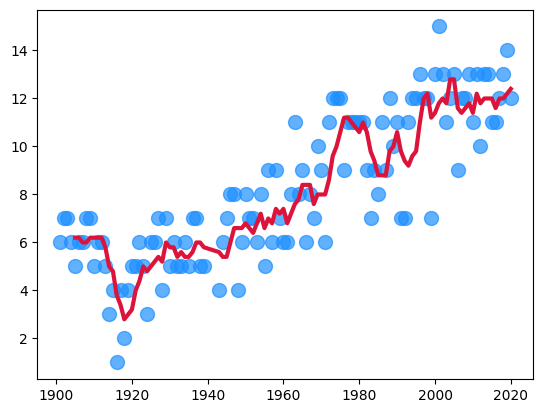

In [35]:
plt.scatter(x=prize_count.index,
           y=prize_count.values,
           c='dodgerblue',
           alpha=0.7,
           s=100)
plt.plot(prize_count.index,
        rolling_prize.values,
        c='crimson',
        linewidth=3)
plt.show()

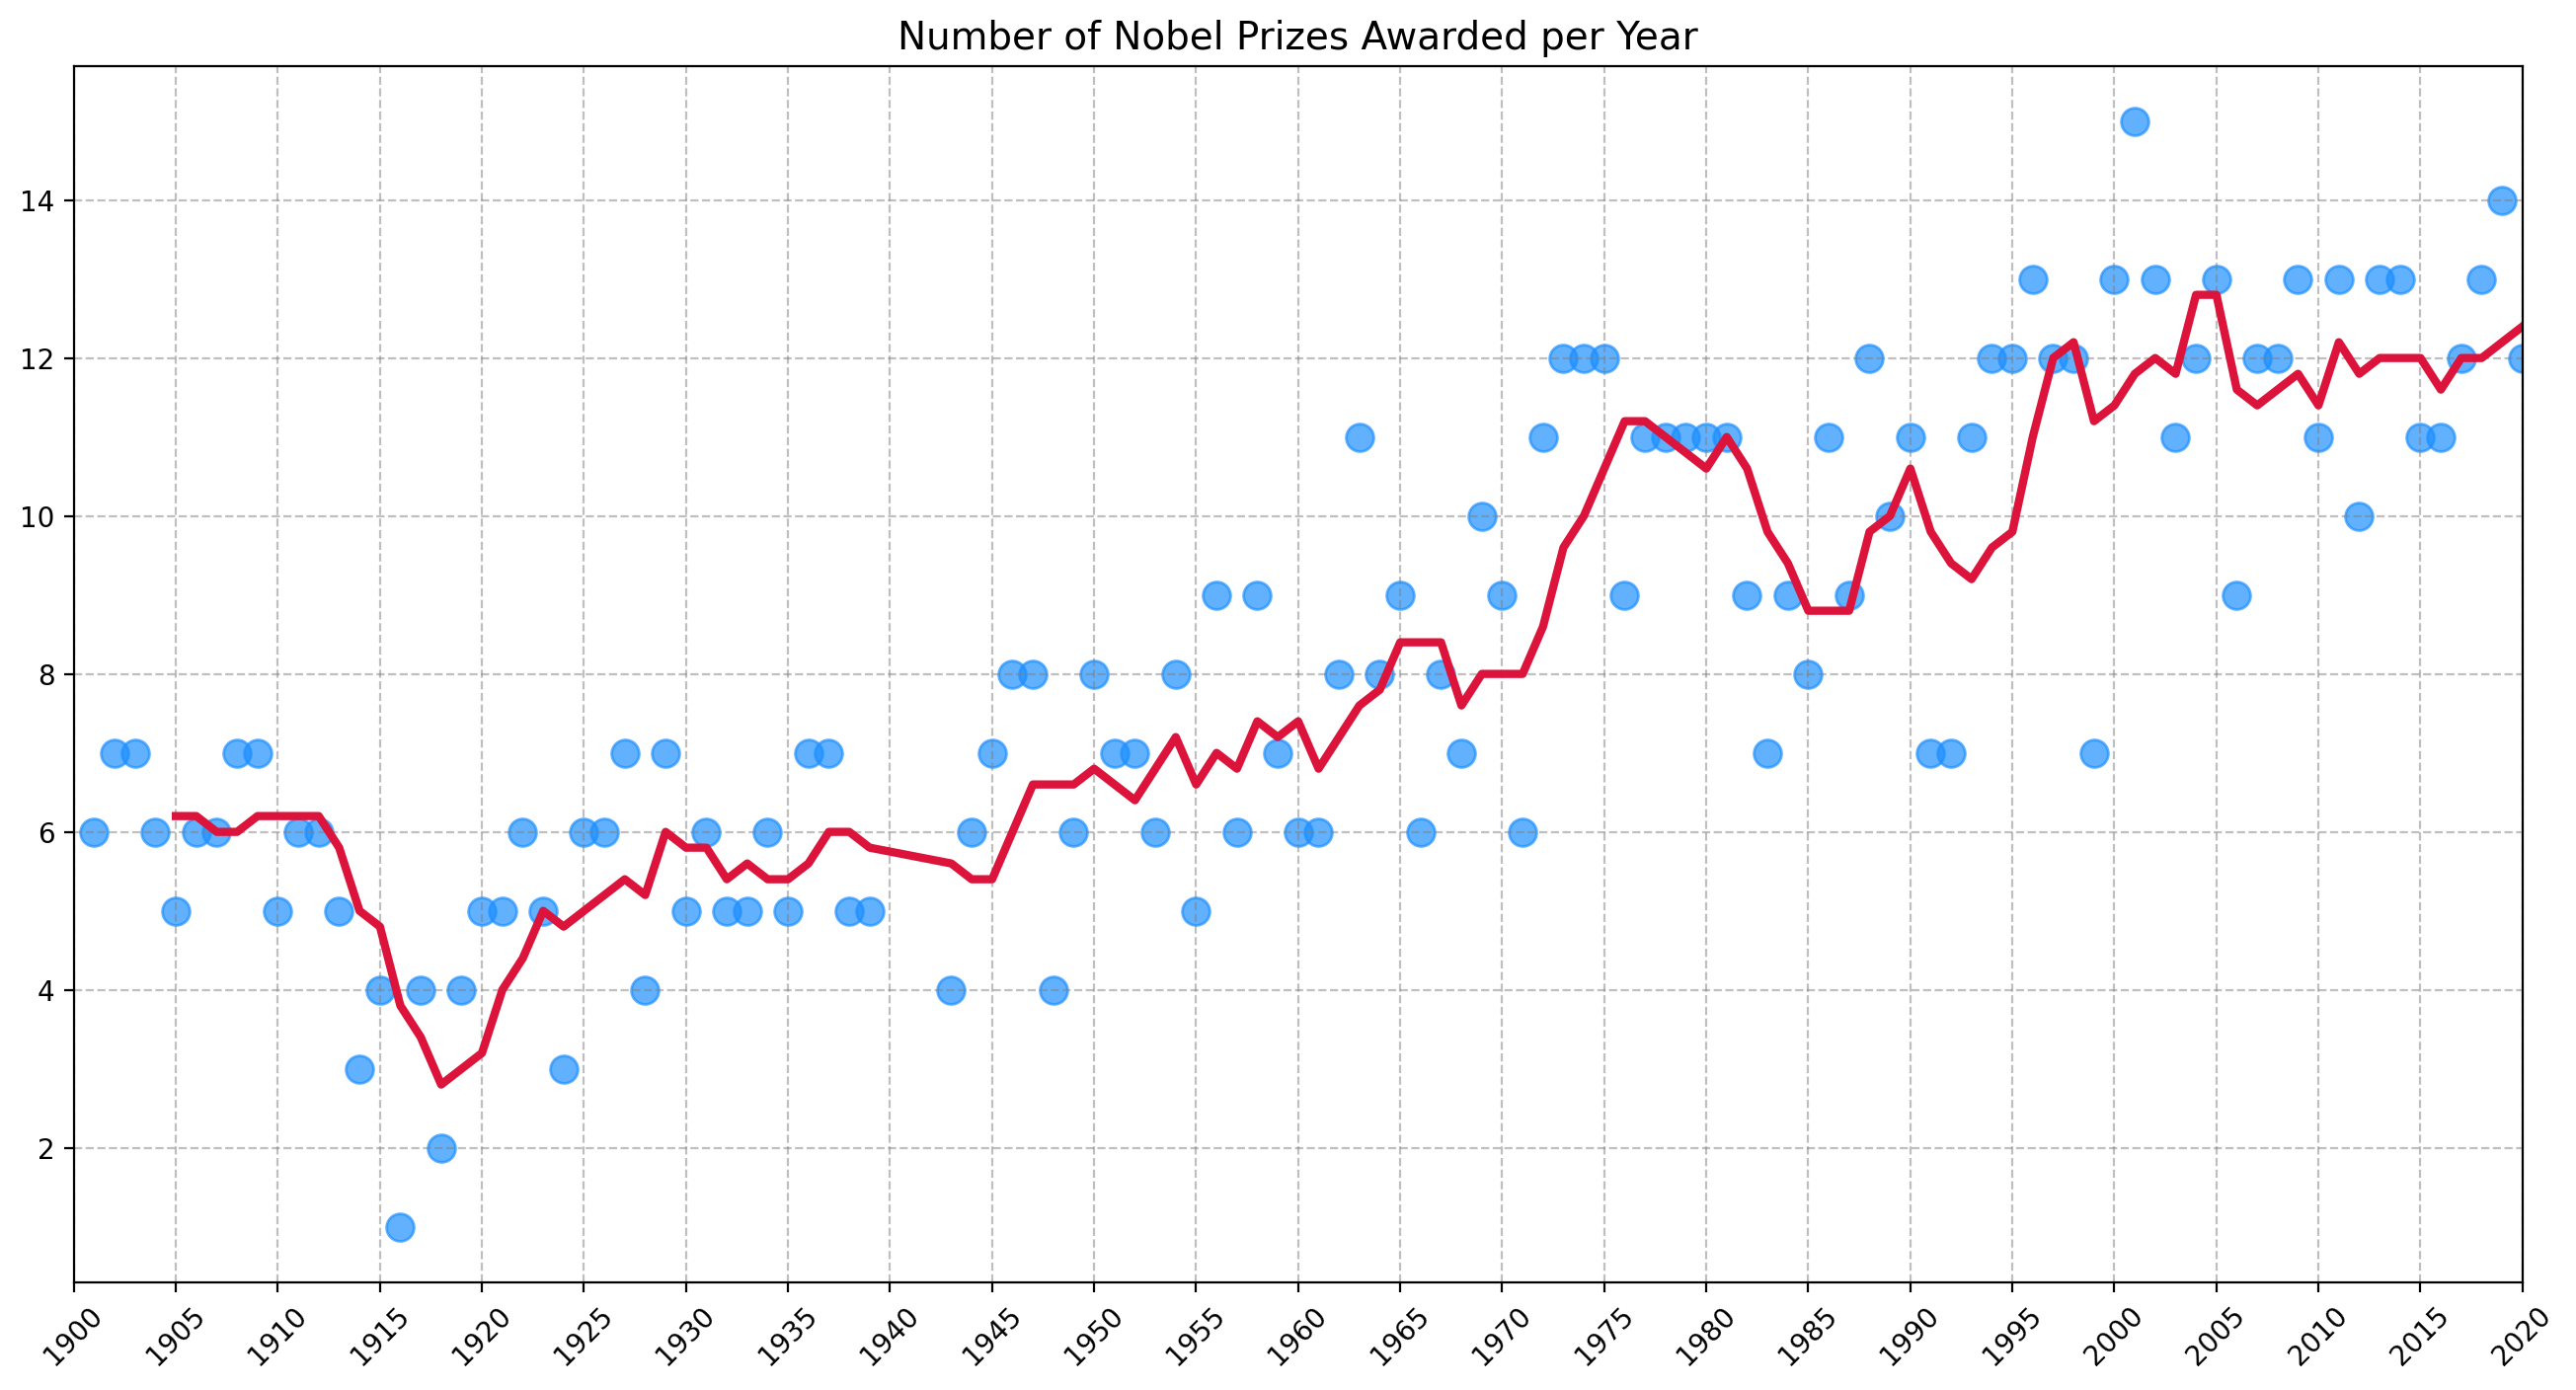

In [36]:
plt.figure(figsize=(16,8),dpi=200)
plt.title("Number of Nobel Prizes Awarded per Year",fontsize=14)

plt.yticks(fontsize=10)
plt.xticks(
    ticks=np.arange(1900,2021,step=5),
    fontsize=10,
    rotation=45
)

ax= plt.gca()
ax.grid(color='grey',alpha=0.5, linestyle='--')

ax.set_xlim(1900,2020)

ax.scatter(
    x=prize_count.index,
    y=prize_count.values,
    c='dodgerblue',
    alpha=0.7,
    s=100
)

ax.plot(
    prize_count.index,
    rolling_prize.values,
    c='crimson',
    linewidth=3
)

plt.show()

# Are More Prizes Shared Than Before?

In [37]:
avg_share_year = df.groupby('year').agg({'share_pct':pd.Series.mean})
avg_share_year

,share_pct
year,
1901,0.83
1902,0.71
1903,0.71
1904,0.83
1905,1.00
...,...
2016,0.55
2017,0.50
2018,0.46


In [38]:
rolling_avg_share = avg_share_year.rolling(window=5).mean()
rolling_avg_share

,share_pct
year,
1901,NaN
1902,NaN
1903,NaN
1904,NaN
1905,0.82
...,...
2016,0.52
2017,0.50
2018,0.50


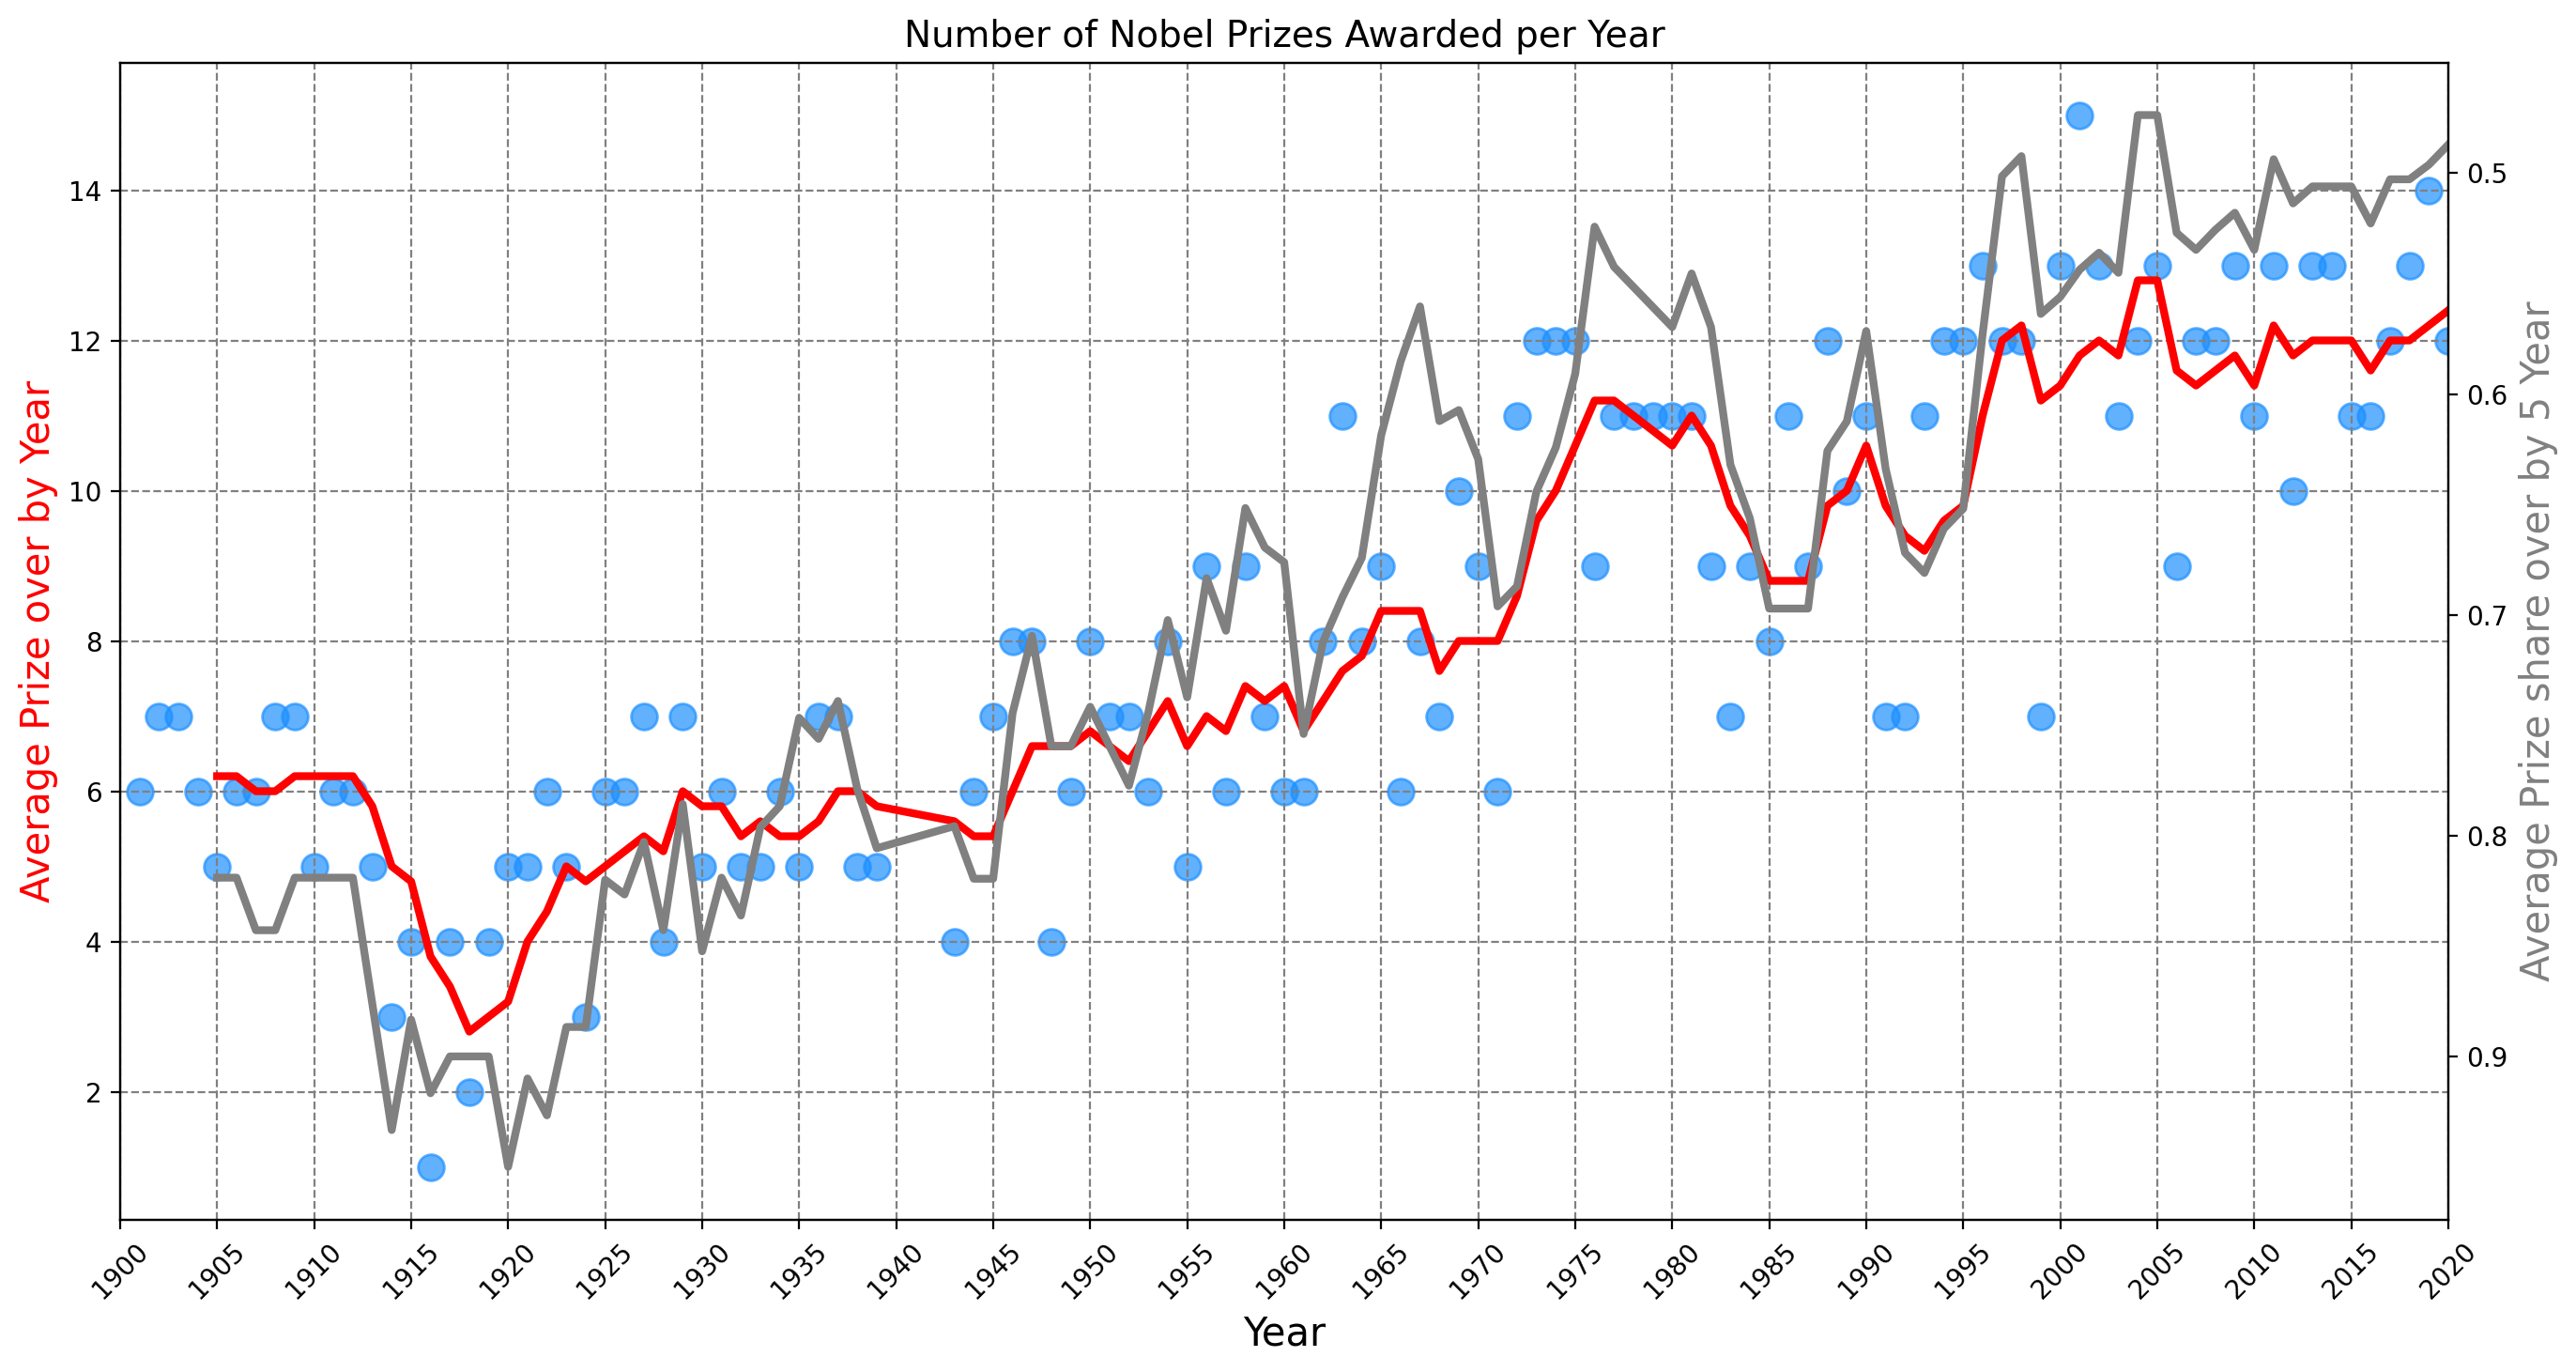

In [39]:
plt.figure(figsize=(16,8),dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year',
         fontsize=14)

plt.xticks(ticks=np.arange(1900,2021,step=5),
          fontsize=10,
          rotation=45
          )
ax1=plt.gca()
ax2=ax1.twinx()
ax1.set_xlim(1900,2020)
ax2.invert_yaxis()

ax1.grid(color='grey', linestyle='--')

ax1.set_xlabel('Year',fontsize=15)
ax1.set_ylabel('Average Prize over by Year',
              color='red',fontsize=15)
ax2.set_ylabel('Average Prize share over by 5 Year',
              color='gray',fontsize=15)

ax1.scatter(x=prize_count.index,
           y=prize_count.values,
           c='dodgerblue',
           alpha=0.7,
           s=100,)

ax1.plot(prize_count.index,
        rolling_prize.values,
        c='red',
        linewidth=3
        )

ax2.plot(prize_count.index,
         rolling_avg_share.values,
         c='gray',
         linewidth=3
)


plt.show()

Well, there is clearly an upward trend in the number of prizes being given out as more and more prizes are shared. Also, more prizes are being awarded from 1969 onwards because of the addition of the economics category. We also see that very few prizes were awarded during the first and second world wars.
<br><br><br><br>

# The Countries with the Most Nobel Prizes

In [40]:
top20_countries = df.groupby('birth_country_current',as_index=False).agg({'prize': pd.Series.count})
top20_countries.sort_values(by='prize',ascending=True,inplace=True)

top20_countries

,birth_country_current,prize
78,Zimbabwe,1
77,Yemen,1
32,Iceland,1
41,Kenya,1
29,Guadeloupe Island,1
...,...,...
67,Sweden,29
25,France,57
26,Germany,84
73,United Kingdom,105


In [41]:
top20_countries = top20_countries[-20:]
hor_bar = px.bar(
    x=top20_countries.prize,
    y=top20_countries.birth_country_current,
    orientation='h',
    color=top20_countries.prize,
    title='Top 20 countries Won the Nobel Prizes'
)

hor_bar.update_layout(
    xaxis_title='No of Prizes',
    yaxis_title='Country',
)
hor_bar.show()

we can see above USA had a most prize Laureates<br><br><br> 

In [42]:
df_country = df.groupby(['birth_country_current','ISO'],as_index=False).agg({'prize':pd.Series.count})
df_country

,birth_country_current,ISO,prize
0,Algeria,DZA,2
1,Argentina,ARG,4
2,Australia,AUS,10
3,Austria,AUT,18
4,Azerbaijan,AZE,1
...,...,...,...
74,United States of America,USA,281
75,Venezuela,VEN,1
76,Vietnam,VNM,1
77,Yemen,YEM,1


In [43]:
country_map = px.choropleth(df_country,
                            locations='ISO',
                            color='prize',
                            hover_name='birth_country_current',
                            color_continuous_scale=px.colors.sequential.matter
)
country_map.show()

# In Which Categories are the Different Countries Winning Prizes? 

In [44]:
top20_countries

,birth_country_current,prize
7,Belgium,9
31,Hungary,9
33,India,9
2,Australia,10
20,Denmark,12
54,Norway,12
13,China,12
51,Netherlands,18
3,Austria,18
39,Italy,19


In [45]:
country_category_grp = df.groupby(['birth_country_current','category'],as_index=False).agg({'prize':pd.Series.count})
country_category_grp

,birth_country_current,category,prize
0,Algeria,Literature,1
1,Algeria,Physics,1
2,Argentina,Medicine,2
3,Argentina,Peace,2
4,Australia,Chemistry,1
...,...,...,...
206,United States of America,Physics,70
207,Venezuela,Medicine,1
208,Vietnam,Peace,1
209,Yemen,Peace,1


In [46]:
merged_grp = pd.merge(country_category_grp,top20_countries,
                     on='birth_country_current')
merged_grp.columns = ['birth_country_current','category','prize_by_categry','Total_country_prize']
merged_grp.sort_values(by='Total_country_prize',inplace=True,ascending=True)
merged_grp

,birth_country_current,category,prize_by_categry,Total_country_prize
12,Belgium,Peace,3,9
42,Hungary,Chemistry,3,9
43,Hungary,Economics,1,9
52,India,Physics,1,9
51,India,Peace,1,9
...,...,...,...,...
104,United States of America,Chemistry,55,281
105,United States of America,Economics,49,281
106,United States of America,Literature,10,281
107,United States of America,Medicine,78,281


In [47]:
# merged_grp = merged_grp.sort_values(by='Total_country_prize')
total_prize_bar = px.bar(
    x=merged_grp.prize_by_categry,
    y=merged_grp.birth_country_current,
    color=merged_grp.category,
    orientation='h',
    title='Top 20 country by Number of Prizes and Category',
    
    )

total_prize_bar.update_layout(
    xaxis_title='No of Prizes by Category',
    yaxis_title='Countries by Category'
)

total_prize_bar.show()

we see that the US has won incredible proportion of prizes
<br><br><br>

### Prizes Won by Each Country Over Time

In [48]:
prize_by_year = df.groupby(['birth_country_current','year'],as_index=False).count()
prize_by_year = prize_by_year.sort_values('year')[['birth_country_current','year','prize']]
prize_by_year

,birth_country_current,year,prize
118,France,1901,2
346,Poland,1901,1
159,Germany,1901,1
312,Netherlands,1901,1
440,Switzerland,1901,1
...,...,...,...
31,Austria,2019,1
221,Germany,2020,1
622,United States of America,2020,7
533,United Kingdom,2020,2


In [49]:
cumulative_prize = prize_by_year.groupby(['birth_country_current','year']).sum().groupby(level=[0],).cumsum() # cumulative the prizes
cumulative_prize.reset_index(inplace=True)
cumulative_prize.sort_values(by='year',ascending=True).head(20)

,birth_country_current,year,prize
118,France,1901,2
346,Poland,1901,1
159,Germany,1901,1
312,Netherlands,1901,1
440,Switzerland,1901,1
313,Netherlands,1902,3
236,India,1902,1
160,Germany,1902,3
441,Switzerland,1902,3
467,United Kingdom,1903,1


In [50]:
line_by_prize = px.line(
    cumulative_prize,
    x='year',
    y='prize',
    color='birth_country_current',
    hover_name='birth_country_current'
)

line_by_prize.update_layout(
    xaxis_title='Year',
    yaxis_title='No of Prizes'
)

line_by_prize.show()

we see is that the United States really started to take off after the Second World War which decimated Europe. Very few laureates were chosen from other parts of the world. This has changed dramatically in the last 40 years or so. There are many more countries represented today than in the early days. Interestingly we also see that the UK and Germany traded places in the 70s and 90s on the total number of prizes won. Sweden being 5th place pretty consistently over many decades is quite interesting too.
<br><br><br><br>

# What are the Top Research Organisations?
Many Nobel laureates are affiliated with a university, a laboratory, or a research organisation (apart from Literature and Peace prize winners as we've seen).

In [51]:
df.organization_name.value_counts()[:20]

organization_name
University of California                        40
Harvard University                              29
Stanford University                             23
Massachusetts Institute of Technology (MIT)     21
University of Chicago                           20
University of Cambridge                         18
Columbia University                             17
California Institute of Technology (Caltech)    17
Princeton University                            15
Max-Planck-Institut                             13
Rockefeller University                          13
University of Oxford                            12
MRC Laboratory of Molecular Biology             10
Yale University                                  9
Cornell University                               8
Bell Laboratories                                8
Institut Pasteur                                 7
Harvard Medical School                           7
London University                                7
Sorbonne Univ

In [52]:
org_prize = df.organization_name.value_counts()[:20]
org_prize.sort_values(ascending=True,inplace=True)


bar_org = px.bar(
    x=org_prize.values,
    y=org_prize.index,
    orientation='h',
    color=org_prize.values,
    title='Top 20 Organizations Won the Nobel Prizes'
)

bar_org.update_layout(
    xaxis_title='No of Prize',
    yaxis_title='Organizations',
)
bar_org.show()

In [53]:
org_prize = df.groupby(['organization_name'],as_index=False).count()[['organization_name','prize']].sort_values('prize',ascending=False)[:20]


bar_org = px.bar(
    x=org_prize.prize,
    y=org_prize.organization_name,
    orientation='h',
    color=org_prize.prize,
    title='Top 20 Organizations Won the Nobel Prizes'
)

bar_org.update_layout(
    xaxis_title='No of Prize',
    yaxis_title='Organizations',
)
bar_org.show()

# Which Cities Make the Most Discoveries? 
****Orginization cities****

In [54]:
city_org = df.organization_city.value_counts()[:20]
city_org.sort_values(ascending=False,inplace=True)
city_org

organization_city
Cambridge, MA      50
New York, NY       45
Cambridge          31
London             27
Paris              25
Stanford, CA       24
Berkeley, CA       21
Chicago, IL        20
Princeton, NJ      19
Pasadena, CA       17
Berlin             12
Oxford             12
Stockholm          10
Moscow             10
Munich              9
Boston, MA          9
Heidelberg          9
New Haven, CT       9
Los Angeles, CA     8
Ithaca, NY          8
Name: count, dtype: int64

In [55]:
city_org_bar = px.bar(x=city_org.values,
                     y=city_org.index,
                     orientation='h',
                     hover_name=city_org.index,
                     color=city_org.values)
city_org_bar.update_layout(
    xaxis_title='No of Prizes',
    yaxis_title='Orginization cities'
)
city_org_bar.show()

# The Nobel Laureate Birth Cities 

In [56]:
laureate_cities = df.birth_city.value_counts()[:20]
laureate_cities.sort_values(ascending=True,inplace=True)

laureate_cities_bar = px.bar(
    x=laureate_cities.values,
    y=laureate_cities.index,
    orientation='h',
    hover_name=laureate_cities.index,
    color=laureate_cities.values
)

laureate_cities_bar.update_layout(
    xaxis_title='No of Prizes',
    yaxis_title= 'laureate Birth cities'
)
laureate_cities_bar.show()

New York, Paris, and London are all very populous. However, Vienna and Budapest are not and still produced many prize winners. That said, much of the ground-breaking research does not take place in big population centres, so the list of birth cities is quite different from the list above. Cambridge Massachusets, Stanford, Berkely and Cambridge (UK) are all the places where many discoveries are made, but they are not the birthplaces of laureates.
<br><br><br><br>

# Combine Country, City, and Organisation
****combine these together in sunburst****

In [57]:
sunburst_df = df.groupby(['organization_country', 
                                       'organization_city', 
                                       'organization_name'],
                         as_index=False).agg({'prize':pd.Series.count})

sunburst_df = sunburst_df.sort_values('prize',ascending=False)
sunburst_df

,organization_country,organization_city,organization_name,prize
205,United States of America,"Cambridge, MA",Harvard University,29
280,United States of America,"Stanford, CA",Stanford University,23
206,United States of America,"Cambridge, MA",Massachusetts Institute of Technology (MIT),21
209,United States of America,"Chicago, IL",University of Chicago,20
195,United States of America,"Berkeley, CA",University of California,19
...,...,...,...,...
110,Japan,Sapporo,Hokkaido University,1
111,Japan,Tokyo,Asahi Kasei Corporation,1
112,Japan,Tokyo,Kitasato University,1
113,Japan,Tokyo,Tokyo Institute of Technology,1


In [58]:
country_city_laur = px.sunburst(sunburst_df,
    path=[
        'organization_country',
          'organization_city',
          'organization_name'
    ],
    values='prize',
    title='Where Do Discoveries Takes Place'
)
# country_city_laur.update_layout(
#     xaxis_title='Number of Prizes', 
#     yaxis_title='City'
# )

country_city_laur.show()

# Patterns in the Laureate Age at the Time of the Award

In [59]:
df.head()

,year,category,prize,motivation,prize_share,share_pct,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,1.00,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,1.00,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,1.00,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,0.50,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,0.50,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


In [60]:
birth_year = df.birth_date.dt.year
winning_age = df.year - birth_year
winning_age

0     49.00
1     62.00
2     47.00
3     79.00
4     73.00
       ... 
957   71.00
958     NaN
959   55.00
960   68.00
961   89.00
Length: 962, dtype: float64

In [61]:
print('The Oldest Nobel Laureate age',winning_age.max())
df[df.index == winning_age.idxmax()]

The Oldest Nobel Laureate age 97.0


,year,category,prize,motivation,prize_share,share_pct,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,0.33,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU


In [62]:
print('The Youngest Nobel Laureate age',winning_age.min())
df[df.index == winning_age.idxmin()]

The Youngest Nobel Laureate age 17.0


,year,category,prize,motivation,prize_share,share_pct,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,0.50,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK


In [63]:
df.insert(1,'winning_age',pd.to_numeric(winning_age))

In [64]:
df

,year,winning_age,category,prize,motivation,prize_share,share_pct,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,49.00,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,1.00,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,62.00,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,1.00,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,47.00,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,1.00,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,79.00,Peace,The Nobel Peace Prize 1901,NaN,1/2,0.50,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,73.00,Peace,The Nobel Peace Prize 1901,NaN,1/2,0.50,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2020,71.00,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,0.33,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR
958,2020,NaN,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,1.00,Organization,World Food Programme (WFP),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
959,2020,55.00,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,0.25,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA
960,2020,68.00,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,0.25,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU


In [65]:
df.winning_age.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

In [66]:
display(df.nlargest(n=1, columns='winning_age'))
display(df.nsmallest(n=1, columns='winning_age'))

,year,winning_age,category,prize,motivation,prize_share,share_pct,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
937,2019,97.00,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,0.33,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU


,year,winning_age,category,prize,motivation,prize_share,share_pct,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
885,2014,17.00,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,0.50,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK


the one who oldest see above data is John Goodenough was 97 years old when he got the Nobel prize!!!  Interestingly John was born to American parents while they were in Germany. This is one example where our analysis of countries counts an extra "German" prize even though he is an American citizen. Too bad we don't have a nationality column in our dataset! Nonetheless, this goes to show it is never too late to win a Nobel prize. I'm keeping my fingers crossed for you!
<br><br><br><br>

# Descriptive Statistics for the Laureate Age at Time of Award

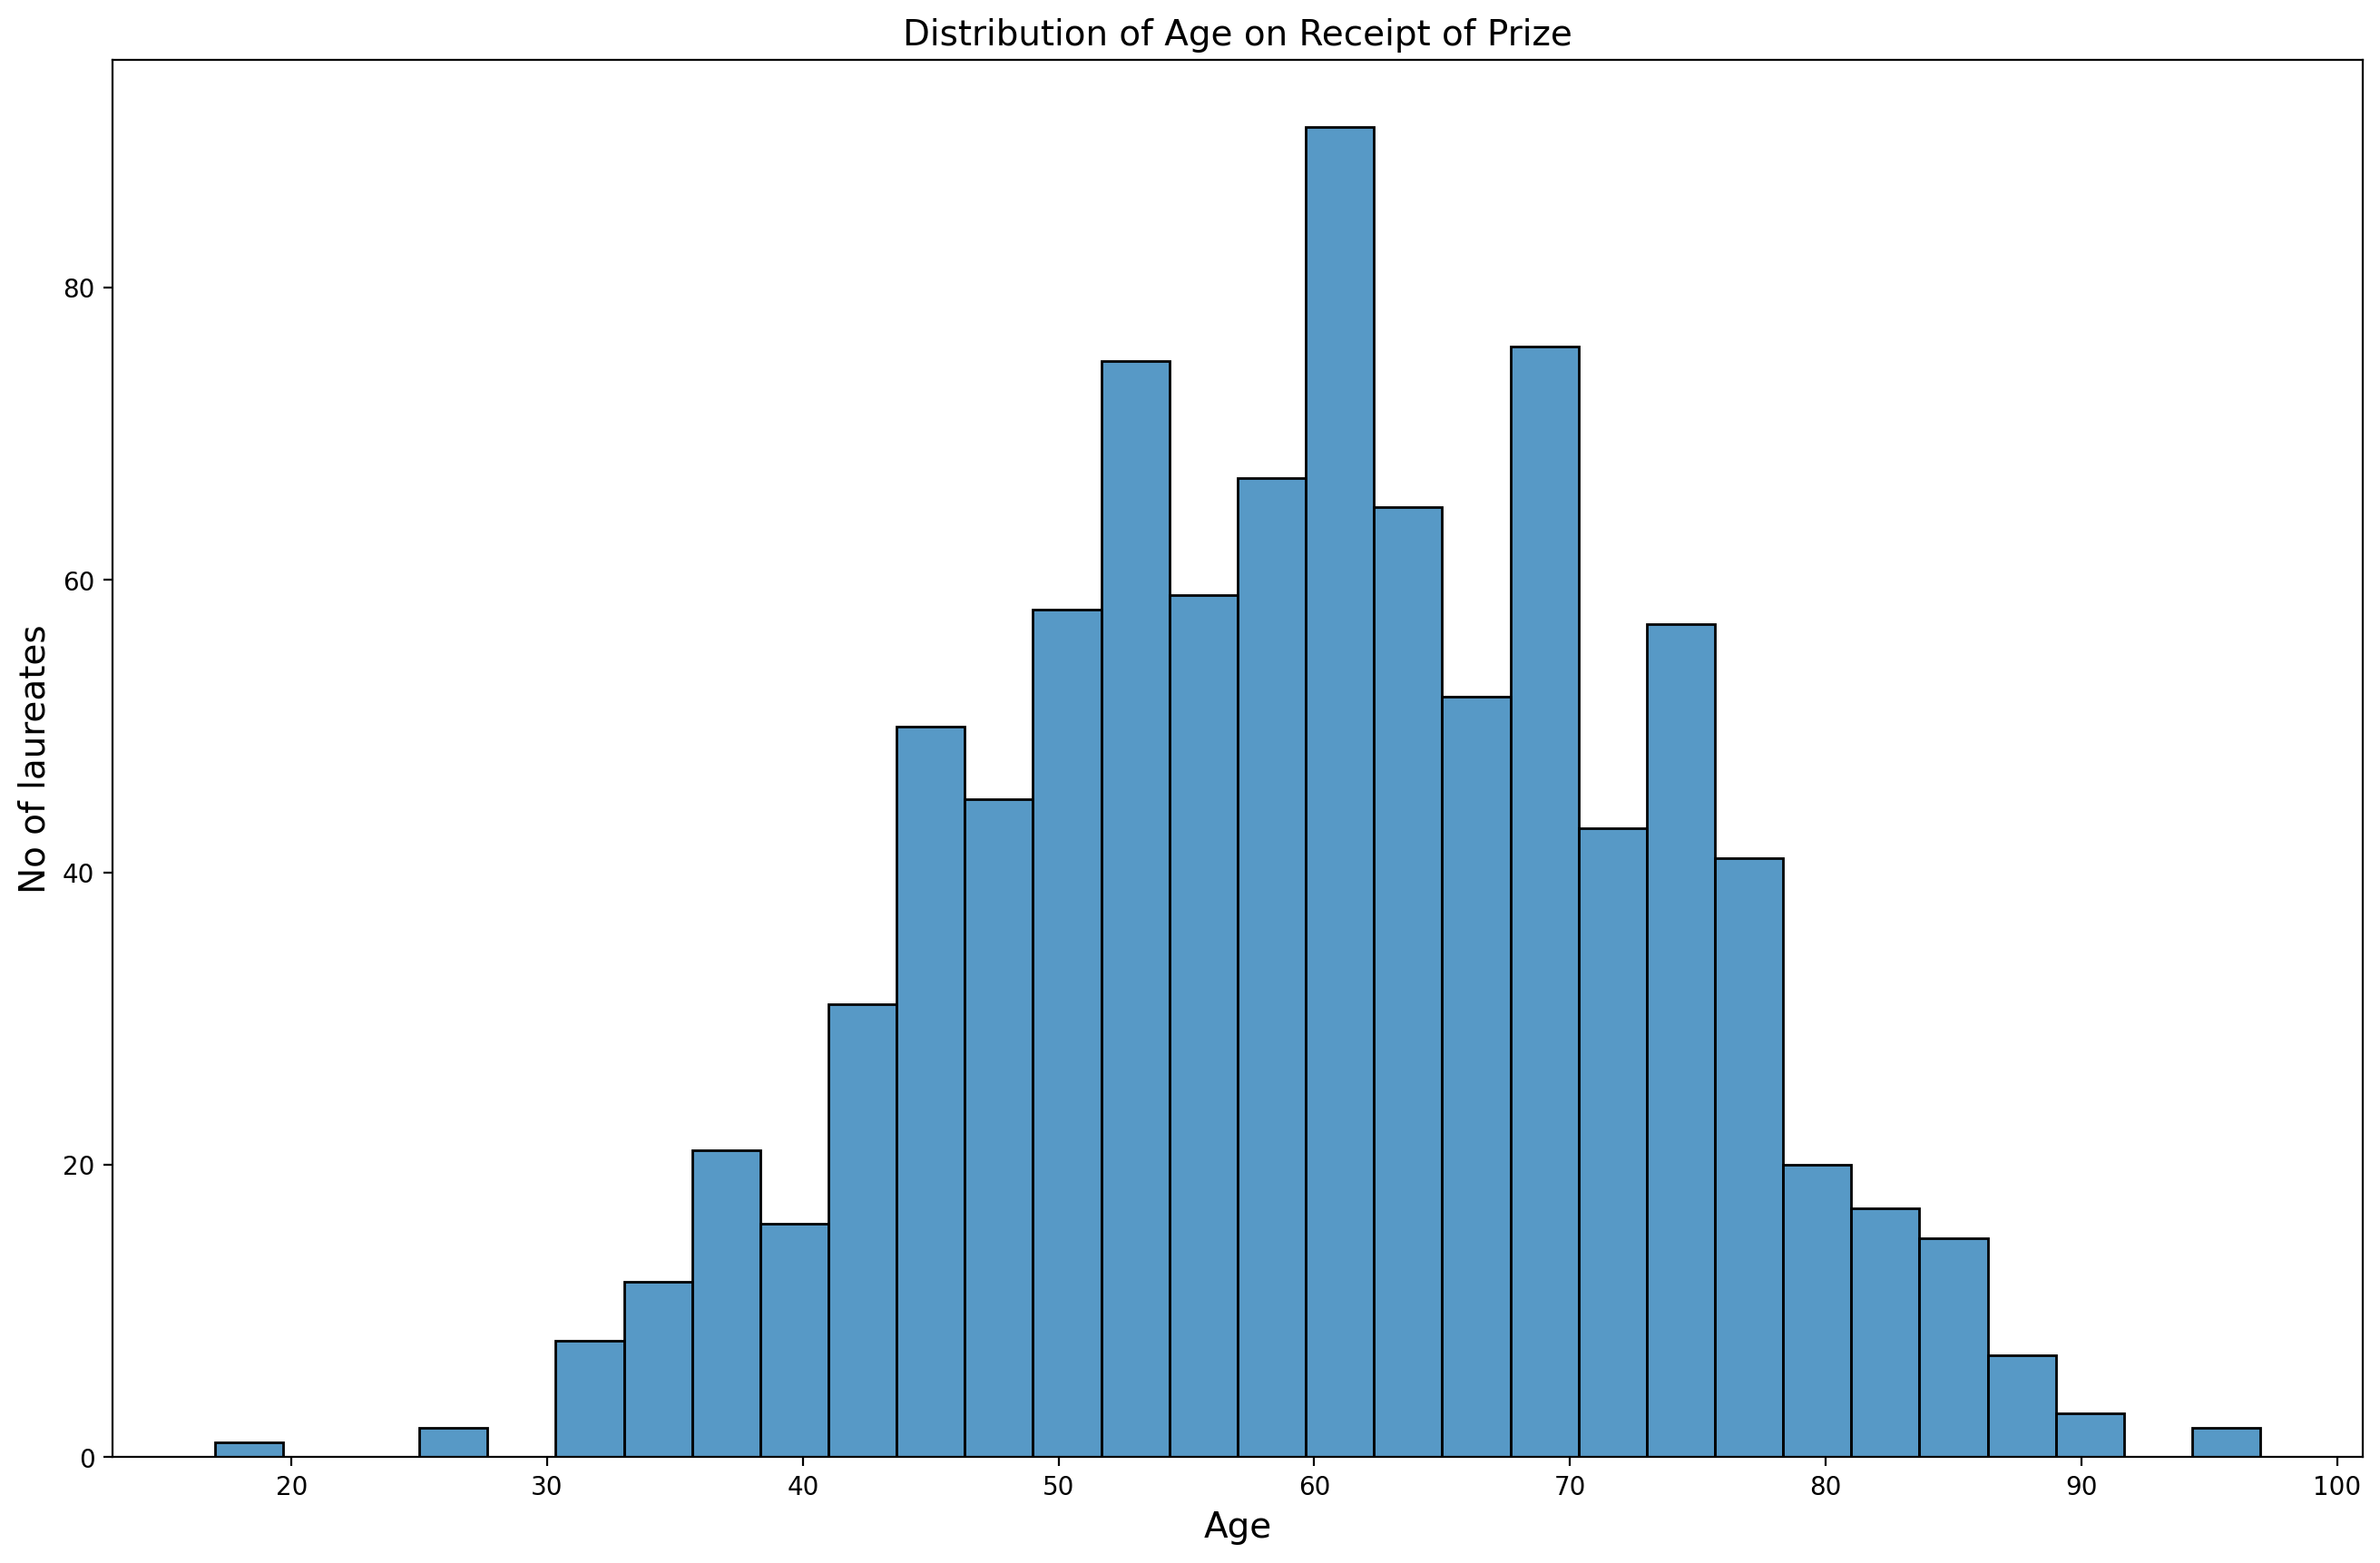

In [67]:
plt.figure(figsize=(16,10),dpi=200)
sns.histplot(data=df,
            x=winning_age,
            bins=30)
plt.xlabel('Age',fontsize=14)
plt.ylabel('No of laureates',fontsize=14)
plt.title('Distribution of Age on Receipt of Prize',fontsize=14)
plt.show()

we see that most of that, which means average age of laureates are 59 Years old.<br><br><br>

## Age at Time of Award throughout History

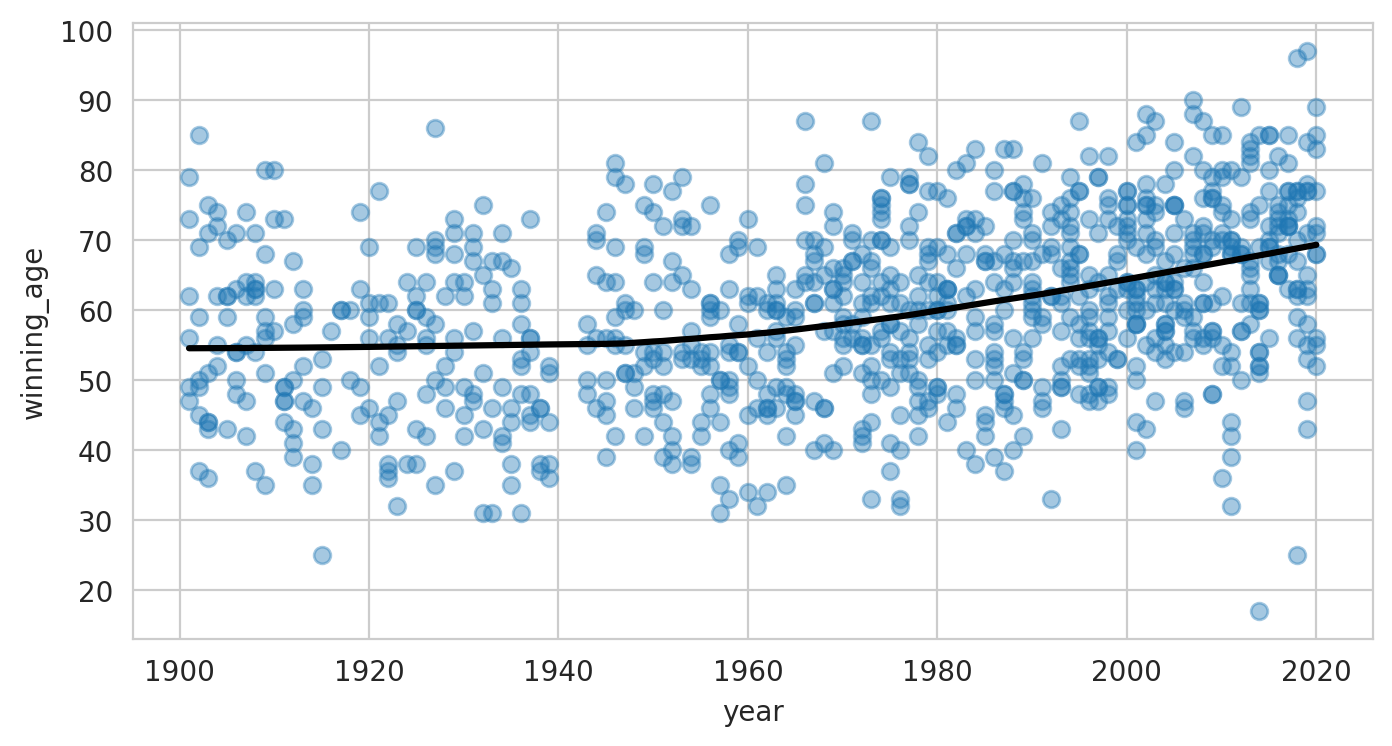

In [68]:
plt.figure(figsize=(8,4),dpi=200)

with sns.axes_style('whitegrid'):
    sns.regplot(data=df,
                x='year',
                y='winning_age',
                line_kws={'color':'black'},
                scatter_kws={'alpha':0.4},
                lowess=True
    )
plt.show()

This is super neat because it clearly shows how the Nobel laureates are getting their award later and later in life. From 1900 to around 1950, the laureates were around 55 years old, but these days they are closer to 70 years old when they get their award! The other thing that we see in the chart is that in the last 10 years the spread has increased. We've see above, more very young and very old winners. In 1950s/60s winners were between 30 and 80 years old. Lately, that range has widened.
<br><br><br><br>

# Laureates Age Across the Nobel Prize Categories


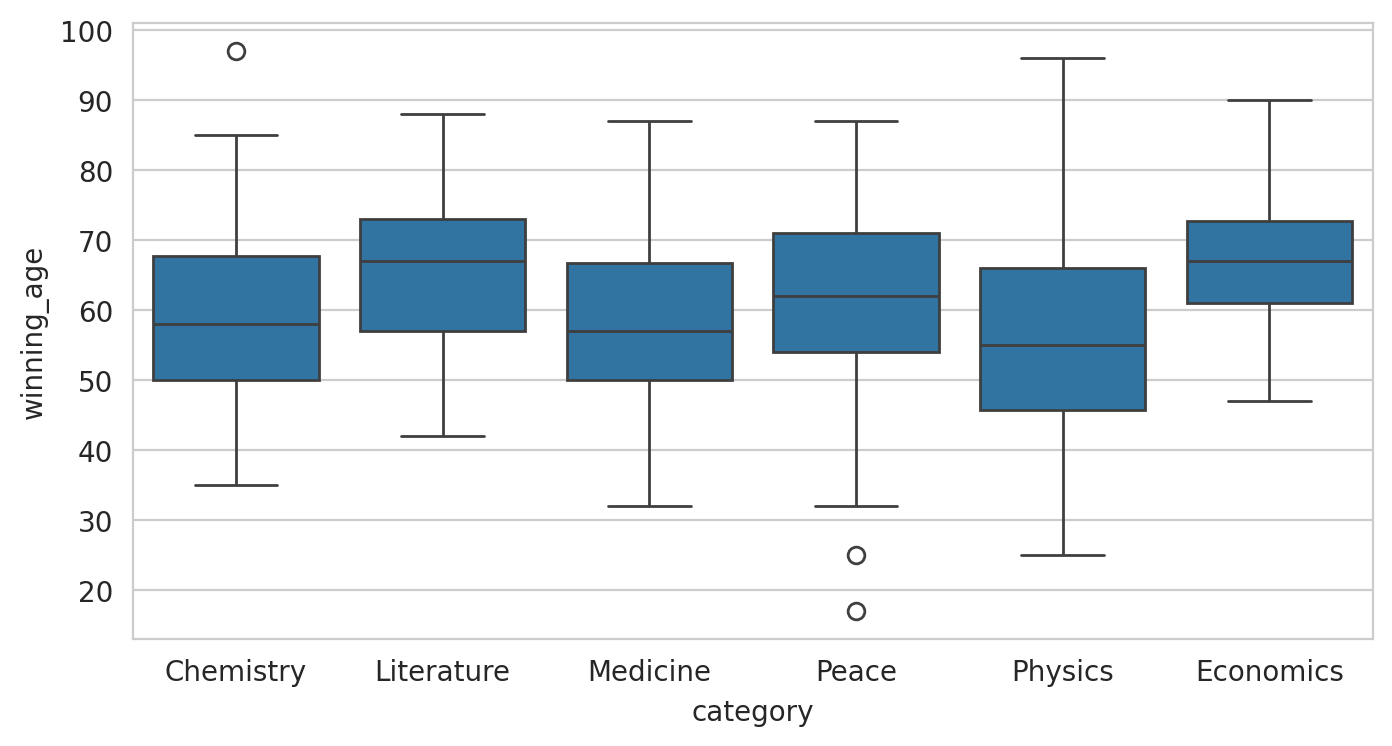

In [69]:
plt.figure(figsize=(8,4),dpi=200)

with sns.axes_style('whitegrid'):
    sns.boxplot(data=df,
                x='category',
                y='winning_age',
    )
plt.show()

In [70]:
age_category_box = px.box(
    x=df.category,
    y=df.winning_age,
    color=df.category,
)

age_category_box.show()

# Laureate Age over Time by Category

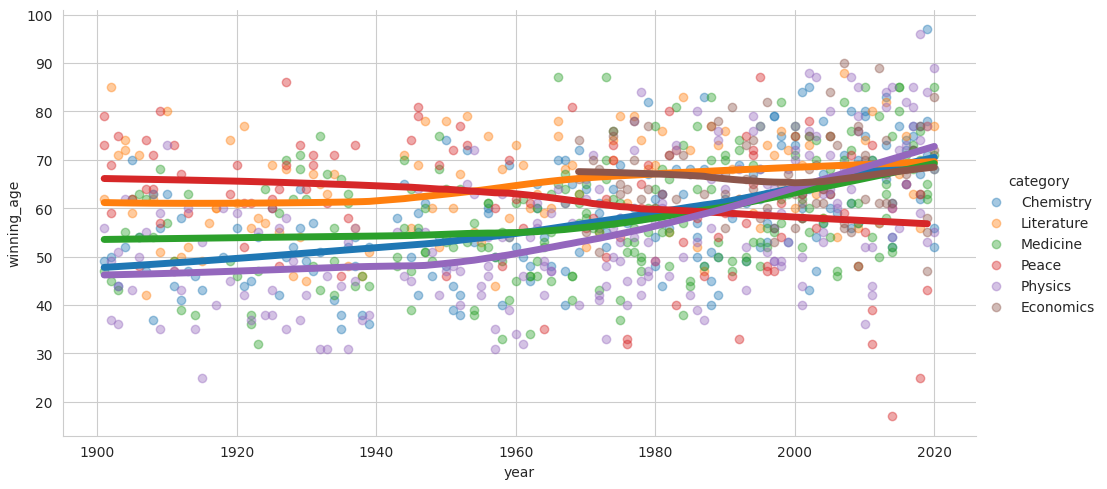

In [71]:
with sns.axes_style('whitegrid'):
    sns.lmplot(
        data=df,
        x='year',
        y='winning_age',
        hue='category',
        lowess=True,
        line_kws={'linewidth':5},
        scatter_kws={'alpha':0.4},
        aspect=2
    )
plt.show()

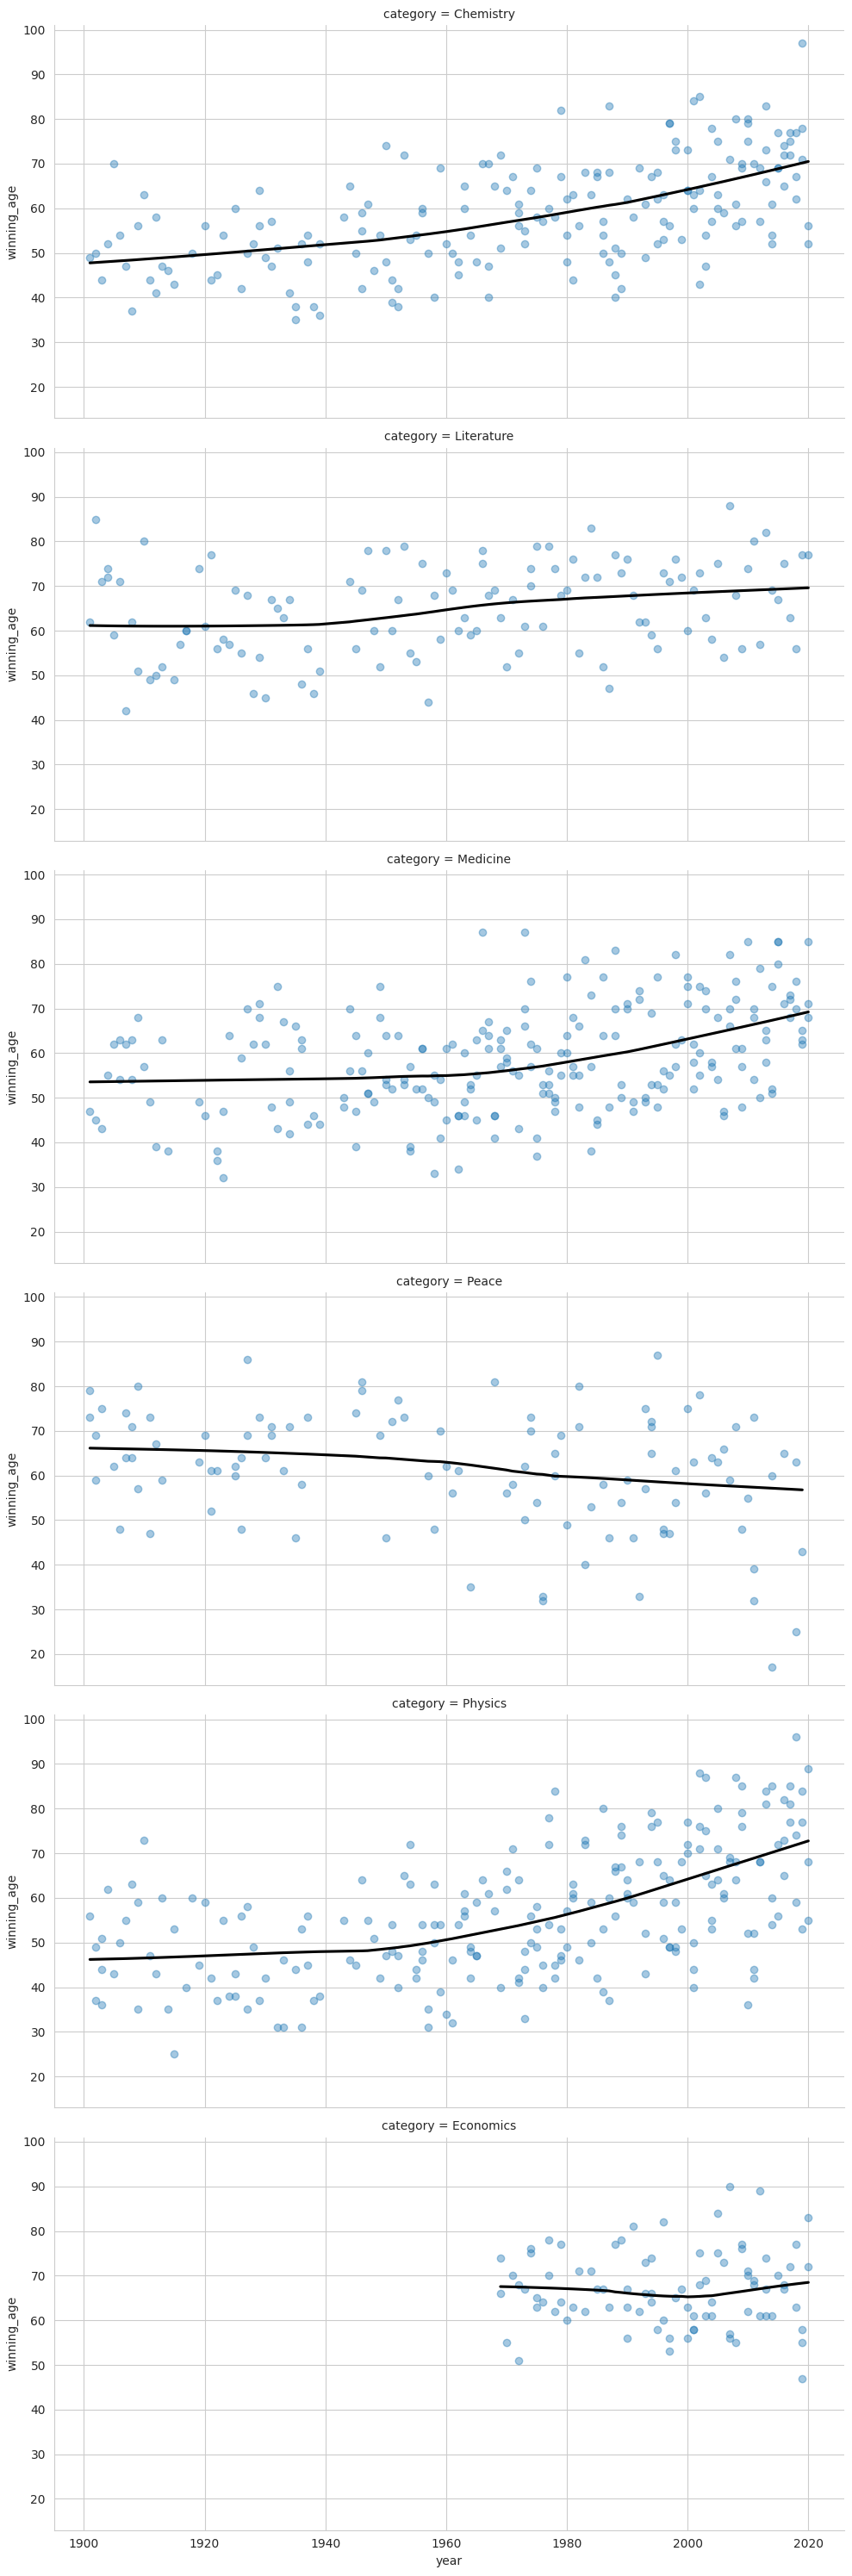

In [72]:
with sns.axes_style('whitegrid'):
    sns.lmplot(data=df,
               x='year',
               y='winning_age',
               row='category',
               lowess=True,
               line_kws={'color':'black'},
               scatter_kws={'alpha':0.4},
               aspect=2
    )
plt.show()

We see that winners in physics, chemistry, and medicine have gotten older over time. 
* The ageing trend is strongest for physics. The average age used to be below 50, but now it's over 70.
* Economics, the newest category, is much more stable in comparison.
* The peace prize shows the opposite trend where winners are getting younger!

As such, our scatter plots showing the best fit lines over time and our box plot of the entire dataset can tell very different stories!